In [1]:
# setup + import
from utils import *
import os
import sklearn
import pandas as pd
import pickle

# setup + import
data = pd.read_csv('../data_processed/breast-cancer-diagnostic.shuf.lrn.csv')
data.head()

pickle_file = open('../data_processed/breast-cancer_column_types.pkl', 'rb')
feature_structure = pickle.load(pickle_file)
pickle_file.close()

In [2]:
feature_columns = feature_structure['bin'] + feature_structure['cat'] + feature_structure['cont'] + feature_structure['ord']

feature_structure["cat"]
TARGET = feature_structure["target"]


X = data[feature_columns]
y = data[TARGET]

values = [v  for _,v in feature_structure.items()]
# pd.DataFrame({"type":[feature_structure.keys()], "columns":  values} )
pd.DataFrame({"type":feature_structure.keys(), "columns":  values} )

,type,columns
0,bin,[]
1,cat,[]
2,ord,[]
3,cont,"[radiusMean, textureMean, perimeterMean, ar..."
4,target,class


In [3]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers0 = [
    SVC(kernel='linear', random_state=42, decision_function_shape='ovo', probability=True),
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
]

classifier1 = [ KNeighborsClassifier(n_jobs=-1)]
model1 = get_pipeline(feature_structure,classifier1[0])

# single model training
res_holdout, model_holdout = perform_holdout(X, y, model1, 42)
res_cv, model_cv = perform_cv(X, y, model1)

results = append_results({}, model_holdout, model_cv, res_holdout, res_cv)
pd.DataFrame(results)

,model,accuracy,precision,recall,f1-score,timing
0,KNeighborsClassifier(n_jobs=-1)_Holdout,0.982456,0.982972,0.982456,0.982400,0.137998
1,KNeighborsClassifier(n_jobs=-1)_CV,0.964912,0.966011,0.964912,0.964515,0.091963


Evaluating multiple models

In [4]:
evaluate_models(data, feature_structure, classifiers0)

,model,accuracy,precision,recall,f1-score,timing
0,"SVC(decision_function_shape='ovo', kernel='lin...",1.000000,1.000000,1.000000,1.000000,0.011487
1,"SVC(decision_function_shape='ovo', kernel='lin...",0.978947,0.979292,0.978947,0.978852,0.074549
2,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)...",0.982456,0.982972,0.982456,0.982400,0.011000
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)_CV",0.964912,0.965999,0.964912,0.964377,0.079000
4,DecisionTreeClassifier(random_state=42)_Holdout,1.000000,1.000000,1.000000,1.000000,0.009001
5,DecisionTreeClassifier(random_state=42)_CV,0.922807,0.923679,0.922807,0.921534,0.067001


Comparison of SVC over kernel functions:

In [5]:

classifiersSVC = [
    SVC(kernel='linear', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='poly', random_state=42),
    SVC(kernel='sigmoid', random_state=42),
]

resultsSVC = evaluate_models(data, feature_structure, classifiersSVC)
resultsSVC

,model,accuracy,precision,recall,f1-score,timing
0,"SVC(kernel='linear', random_state=42)_Holdout",1.000000,1.000000,1.000000,1.000000,0.006997
1,"SVC(kernel='linear', random_state=42)_CV",0.978947,0.979292,0.978947,0.978852,0.057000
2,SVC(random_state=42)_Holdout,1.000000,1.000000,1.000000,1.000000,0.006001
3,SVC(random_state=42)_CV,0.975439,0.975902,0.975439,0.975201,0.059000
4,"SVC(kernel='poly', random_state=42)_Holdout",0.929825,0.937411,0.929825,0.928640,0.006000
5,"SVC(kernel='poly', random_state=42)_CV",0.926316,0.934350,0.926316,0.923461,0.057999
6,"SVC(kernel='sigmoid', random_state=42)_Holdout",1.000000,1.000000,1.000000,1.000000,0.005998
7,"SVC(kernel='sigmoid', random_state=42)_CV",0.947368,0.948766,0.947368,0.946938,0.056002


Comparison of KNeighbours over k 

In [6]:
classifierKneighbors = [ KNeighborsClassifier(n_jobs=-1, n_neighbors=k) for k in range(2, 13)]
resultsKNeighbors = evaluate_models(data, feature_structure, classifierKneighbors)
resultsKNeighbors

,model,accuracy,precision,recall,f1-score,timing
0,"KNeighborsClassifier(n_jobs=-1, n_neighbors=2)...",0.964912,0.966917,0.964912,0.964666,0.012001
1,"KNeighborsClassifier(n_jobs=-1, n_neighbors=2)_CV",0.947368,0.950313,0.947368,0.946136,0.076998
2,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)...",0.982456,0.982972,0.982456,0.982400,0.010002
3,"KNeighborsClassifier(n_jobs=-1, n_neighbors=3)_CV",0.964912,0.965999,0.964912,0.964377,0.075000
4,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4)...",0.947368,0.951754,0.947368,0.946758,0.009002
5,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4)_CV",0.954386,0.956431,0.954386,0.953570,0.077000
6,KNeighborsClassifier(n_jobs=-1)_Holdout,0.982456,0.982972,0.982456,0.982400,0.009001
7,KNeighborsClassifier(n_jobs=-1)_CV,0.964912,0.966011,0.964912,0.964515,0.076000
8,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6)...",0.982456,0.982972,0.982456,0.982400,0.009000
9,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6)_CV",0.964912,0.965925,0.964912,0.964468,0.078000


Decision Tree comparison over max_deph

In [7]:
classifierDecisionTree = [ DecisionTreeClassifier(random_state=42, max_depth=depth) for depth in range(3, 15)]
resultsDecisionTree = evaluate_models(data, feature_structure, classifierDecisionTree)
resultsDecisionTree

,model,accuracy,precision,recall,f1-score,timing
0,"DecisionTreeClassifier(max_depth=3, random_sta...",0.982456,0.982972,0.982456,0.982400,0.007998
1,"DecisionTreeClassifier(max_depth=3, random_sta...",0.933333,0.936280,0.933333,0.932908,0.063000
2,"DecisionTreeClassifier(max_depth=4, random_sta...",0.982456,0.982972,0.982456,0.982400,0.007000
3,"DecisionTreeClassifier(max_depth=4, random_sta...",0.926316,0.929981,0.926316,0.925769,0.062998
4,"DecisionTreeClassifier(max_depth=5, random_sta...",1.000000,1.000000,1.000000,1.000000,0.007000
5,"DecisionTreeClassifier(max_depth=5, random_sta...",0.919298,0.920630,0.919298,0.917634,0.062998
6,"DecisionTreeClassifier(max_depth=6, random_sta...",0.982456,0.982972,0.982456,0.982400,0.008001
7,"DecisionTreeClassifier(max_depth=6, random_sta...",0.915789,0.916569,0.915789,0.914473,0.062000
8,"DecisionTreeClassifier(max_depth=7, random_sta...",1.000000,1.000000,1.000000,1.000000,0.009000
9,"DecisionTreeClassifier(max_depth=7, random_sta...",0.922807,0.923679,0.922807,0.921534,0.064001


# Competition classification

In [8]:
from sklearn.svm import SVC
import pandas as pd

test_data = pd.read_csv('../data_processed/breast-cancer-diagnostic.shuf.tes.csv')
T = test_data[feature_columns]

classifier = SVC(kernel='linear', random_state=42, decision_function_shape='ovo', probability=True)
model = get_pipeline(feature_structure,classifier)

# training
res_cv, model_cv = perform_cv(X, y, model)
# prediction
pred = model_cv.predict(T)

with open('../data_processed/kaggle-breast-cancer-prediction.csv', 'w', newline='') as file:
    for id_value, pred_value in zip(test_data["ID"], pred):
        file.write(f"{id_value},{pred_value}\n")


In [9]:
print(results_to_latex(resultsKNeighbors, "Results Breast Cancer k-NN", "bc_knn"))
print("\n")
print(results_to_latex(resultsDecisionTree, "Results Breast Cancer Decision Trees", "bc_dt"))
print("\n")
print(results_to_latex(resultsSVC, "Results Breast Cancer SVC", "bc_svc"))

\begin{table}[H]
\centering
\resizebox{0.8\textwidth}{!}{
\begin{tabular}{|l|rr|rr|rr|rr|rr|}
\toprule
 & \multicolumn{2}{c|}{accuracy} & \multicolumn{2}{c|}{precision} & \multicolumn{2}{c|}{recall} & \multicolumn{2}{c|}{f1-score} & \multicolumn{2}{c|}{timing} \\
Parameters & holdout & cv & holdout & cv & holdout & cv & holdout & cv & holdout & cv \\
\hline
k=2 & 0.965 & 0.947 & 0.967 & 0.950 & 0.965 & 0.947 & 0.965 & 0.946 & 0.012 & 0.077 \\
k=3 & 0.982 & 0.965 & 0.983 & 0.966 & 0.982 & 0.965 & 0.982 & 0.964 & 0.010 & 0.075 \\
k=4 & 0.947 & 0.954 & 0.952 & 0.956 & 0.947 & 0.954 & 0.947 & 0.954 & 0.009 & 0.077 \\
k=5 & 0.982 & 0.965 & 0.983 & 0.966 & 0.982 & 0.965 & 0.982 & 0.965 & 0.009 & 0.076 \\
k=6 & 0.982 & 0.965 & 0.983 & 0.966 & 0.982 & 0.965 & 0.982 & 0.964 & 0.009 & 0.078 \\
k=7 & 0.982 & 0.965 & 0.983 & 0.966 & 0.982 & 0.965 & 0.982 & 0.965 & 0.010 & 0.075 \\
k=8 & 0.982 & 0.968 & 0.983 & 0.969 & 0.982 & 0.968 & 0.982 & 0.968 & 0.009 & 0.075 \\
k=9 & 0.982 & 0.972 & 0.983 & 0

In [10]:
# testiing pickle
# model = KNeighborsClassifier(n_jobs=-1, n_neighbors=2
results, model  = perform_holdout(X, y, SVC(kernel='linear'), 42)
pickle.dump(model, open('./breast-cancer-knn.pkl', 'wb'))

model_loaded = pickle.load(open('./breast-cancer-knn.pkl', 'rb'))


# Visualisation of results

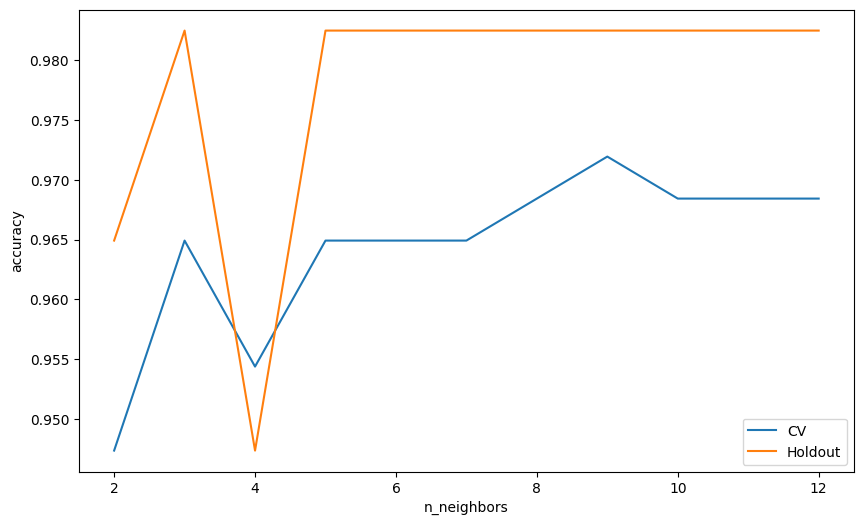

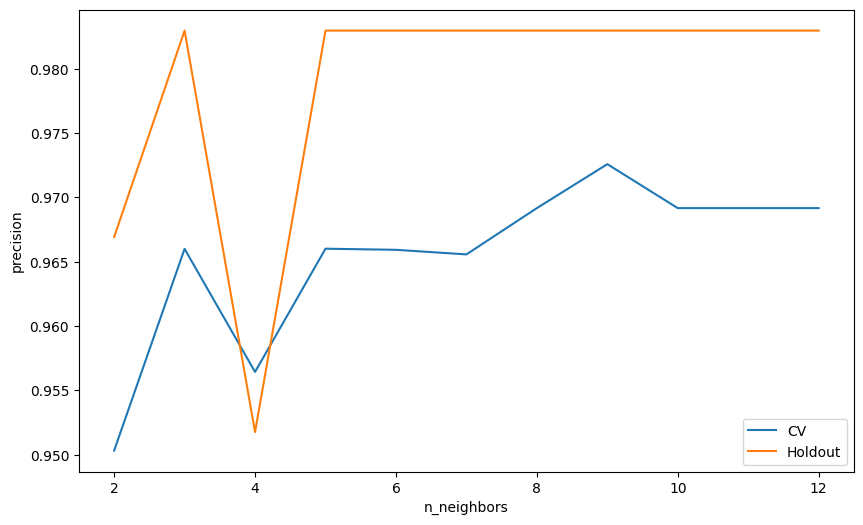

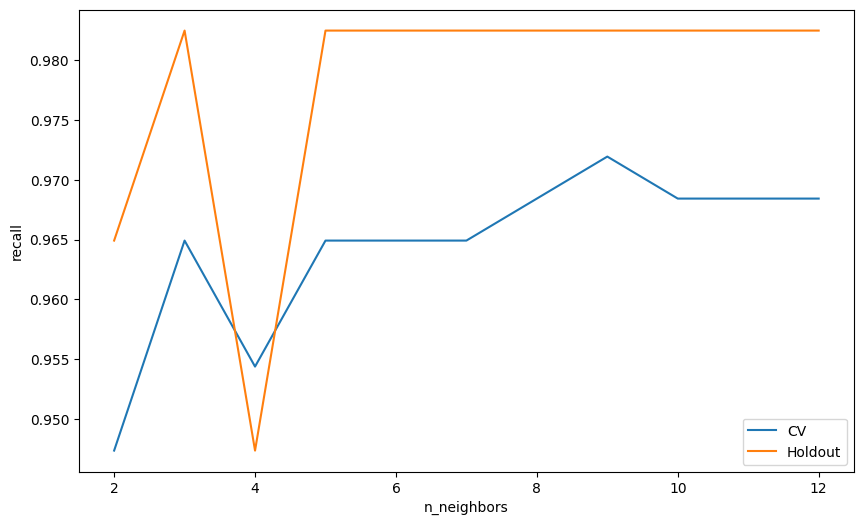

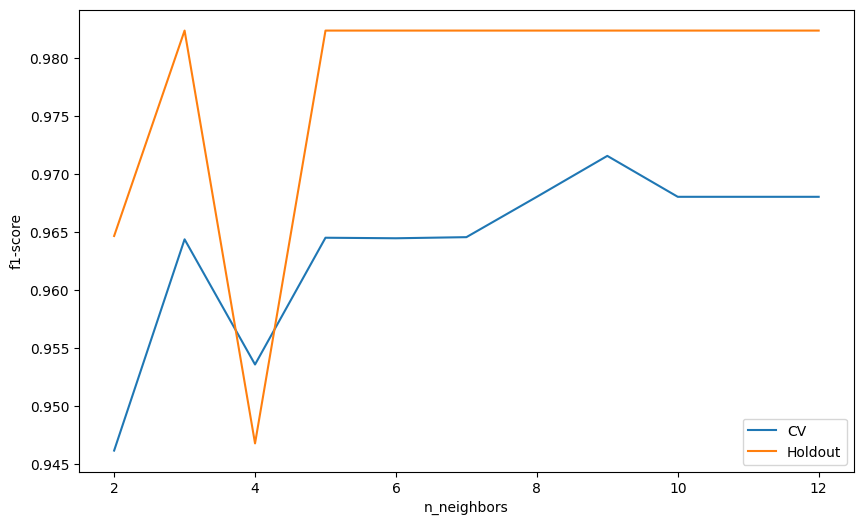

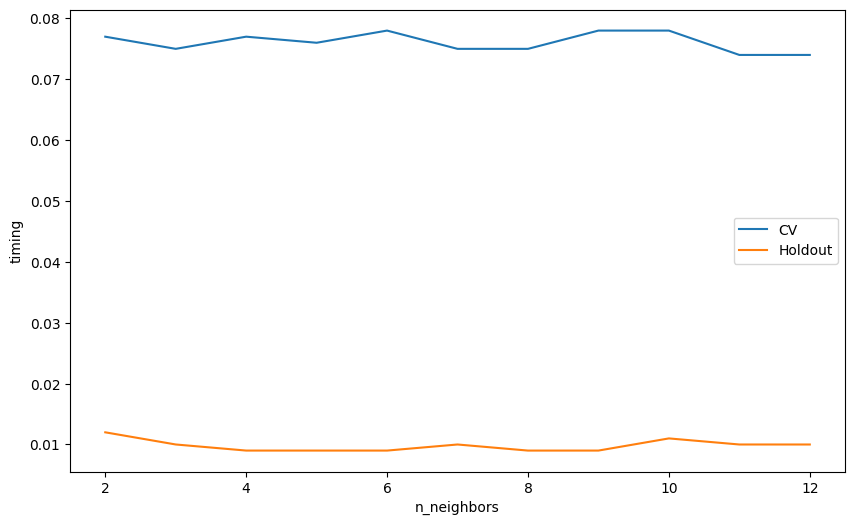

In [11]:
from visualisation import visualise_results

visualise_results(resultsSVC, "breast-cancer", 'kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
visualise_results(resultsDecisionTree,"breast-cancer" ,'max_depth', range(3, 15))
visualise_results(resultsKNeighbors, "breast-cancer", 'n_neighbors', range(2, 13), print_results=True)

In [12]:
results_cv_svc = resultsSVC[resultsSVC['model'].str.endswith('_CV')]
results_cv_dt = resultsDecisionTree[resultsDecisionTree['model'].str.endswith('_CV')]
results_cv_knn = resultsKNeighbors[resultsKNeighbors['model'].str.endswith('_CV')]

results_cv_svc.iloc[np.argmax(results_cv_svc['accuracy'])]
results_cv_dt.iloc[np.argmax(results_cv_dt['accuracy'])]
results_cv_knn.iloc[np.argmax(results_cv_knn['accuracy'])]

best_models = [
    get_pipeline(feature_structure,SVC(kernel='linear', random_state=42)),
    get_pipeline(feature_structure,DecisionTreeClassifier(random_state=42, max_depth=3)),
    get_pipeline(feature_structure,KNeighborsClassifier(n_jobs=-1, n_neighbors=12))
]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

_ , modelSVC = perform_cv(X, y, best_models[0])
_ , modelDT = perform_cv(X, y, best_models[1])
_ , modelKNN = perform_cv(X, y, best_models[2])

# prediction
y_predKNN = modelKNN.predict(testX)
y_predSVC = modelSVC.predict(testX)
y_predDT = modelDT.predict(testX)

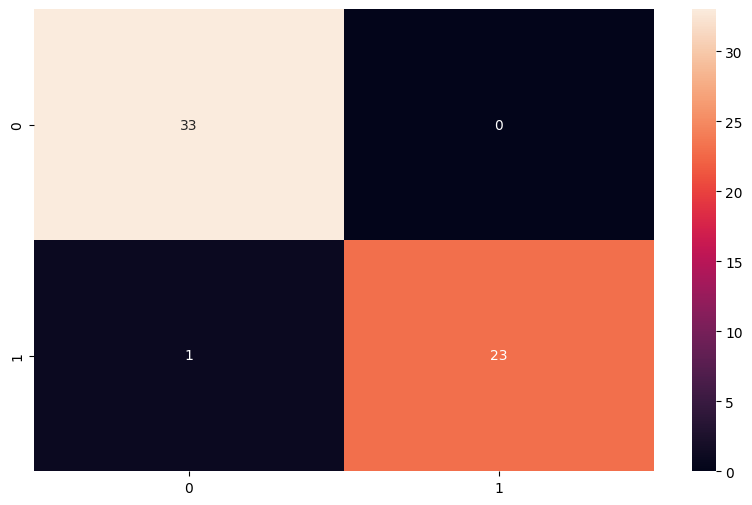

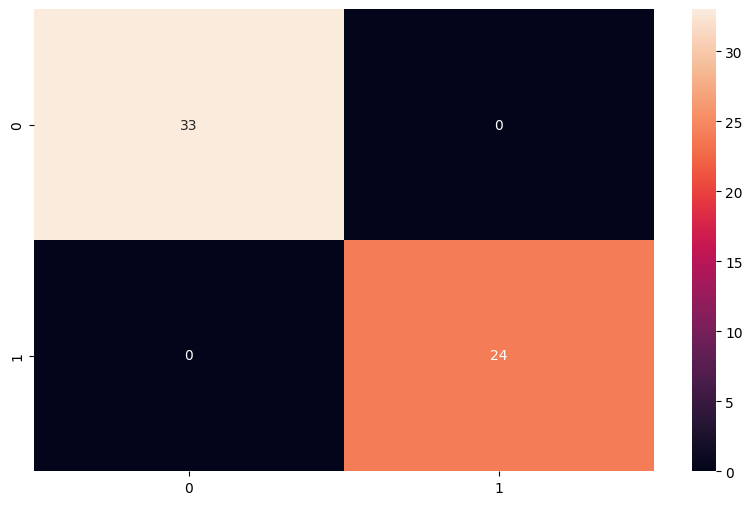

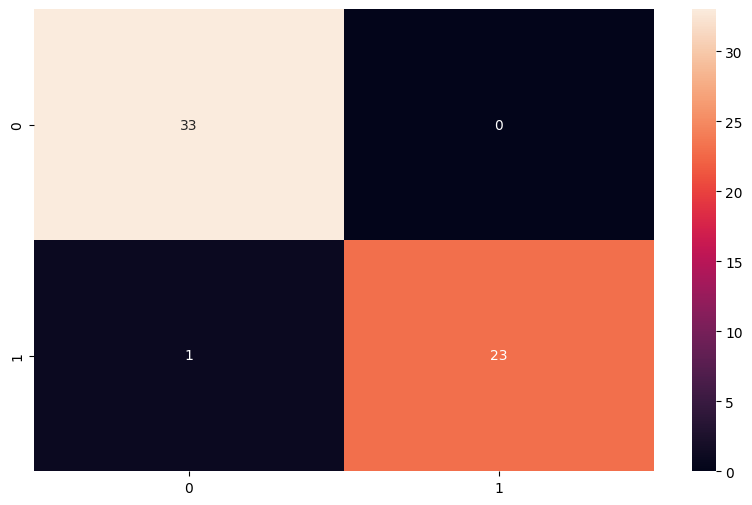

<module 'matplotlib.pyplot' from 'c:\\Users\\Adam\\Documents\\TUWien\\2024WS\\MachineLearning\\MachineLearingn2024SS\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [13]:
from visualisation import plot_confusion_matrix

plot_confusion_matrix(testY, y_predKNN, "breast_knn")
plot_confusion_matrix(testY, y_predSVC, "brest_svc")
plot_confusion_matrix(testY, y_predDT, "breast_dt")